# Backpropagation #

In this lab session we will code a backpropagation algorithm. This backpropagation algorithm is needed to implement a gradient descent method of learning for a neural network.  

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Function to be fitted

We want to approach the following function with a neural network
$$f(x_1,x_2) = 1+ (1 - x_1 + x_1^2) \sin(\pi x_2)$$

In [2]:
def f_deterministic(x):
    f = 1 + (1-x[1]+x[1]**2) * np.sin(np.pi * x[2])
    return f

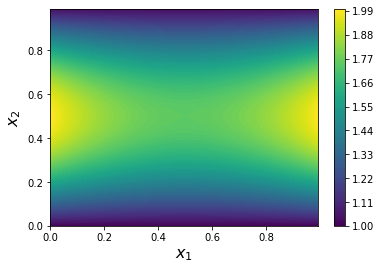

In [3]:
plt.figure()
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
xx1, xx2 = np.meshgrid(x1, x2)
xx0 = np.ones(xx1.shape)
xx = np.stack((xx0, xx1, xx2), axis=0)
z = f_deterministic(xx)
h = plt.contourf(x1,x2,z,100)
cbar = plt.colorbar(h)

### Neural network
We build a neural network with 4 layers. Each layer has $N_l$ neurons. We use the notations $p^{(l)}$ and $o^{(l)}$ for the predecessor and output vectors of neurons in layer $l$ ($l=0\ldots L$). The matrices of synaptic weights are noted $\Theta^{(l)}$. 

### Feedforward calculation
The feedforward calculation aims at calculating $h_\theta(x)$ using the following feedforward procedure
\begin{align}
o^{(0)} & = x \\
p^{(1)} & = \Theta^{(0)}\cdot o^{(0)}\\
o^{(1)} & = g\left( p^{(1)} \right) \\
p^{(2)} & = \Theta^{(1)}\cdot o^{(1)}\\
o^{(2)} & = g\left( p^{(2)} \right) \\
p^{(3)} & = \Theta^{(2)}\cdot o^{(2)}\\
o^{(3)} & = p^{(3)} \\
h_\theta(x) & = o^{(3)}
\end{align}
where $x=[1, x_1, x_2]$ and $g$ is a non-linear "sigmoid" function. 

In [7]:
# Number of neurons in each layer
N0 = 3  # INPUT (x0 = 1, x1, x2)
N1 = 8
N2 = 8
N3 = 1  # OUTPUT
Ns = (N0, N1, N2, N3)

In [8]:
def NLfunction(p):
    f = np.maximum(0,p)
    fprime = 0.5 + 0.5*np.sign(p)
    # f = np.tanh(p)
    # fprime = 1 - np.tanh(p)**2
    # f = 1/(1+np.exp(-p))
    # fprime = f * (1-f)
    return f, fprime

In [9]:
def NN(Thetas, x):
    o0 = x
    p1 = Thetas[0].dot(o0)
    o1, gp1 = NLfunction(p1)
    p2 = Thetas[1].dot(o1)
    o2, gp2  = NLfunction(p2)
    p3 = Thetas[2].dot(o2)
    o3 = p3
    gp3 = 1
    
    os = (o0, o1, o2, o3)
    gps= (1, gp1, gp2, gp3)
    h = o3
    return h, os, gps    

In [17]:
# Random initialisation of matrices
Theta0 = np.random.normal(scale=1.0,size=(Ns[1],Ns[0]))
Theta1 = np.random.normal(scale=1.0,size=(Ns[2],Ns[1]))
Theta2 = np.random.normal(scale=1.0,size=(Ns[3],Ns[2]))
Thetas = (Theta0, Theta1, Theta2)

### Question 1
Plot the output of the NN for 0<x1<1, 0<x2<1

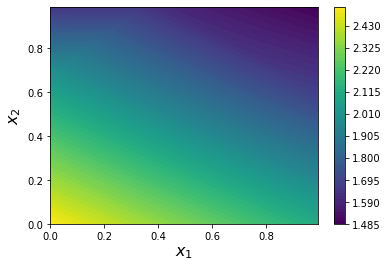

In [18]:
# Plot the output here


### Backpropagation algorithm

As we have seen in Lesson 5, the backpropagation algorithm consists first in calculating the vectors $\delta^{(l)}$ for each layer starting by the output layer $l=L=2$ and calculating $\delta$'s for each layer recursively. 

\begin{align}
\delta^{(L)} & = (h_\theta(x) - y) g'(p^{(L)}) \\
\delta^{(l)} & = \left(\Theta^{(l)}\right)^T \delta^{(l+1)} .* g'\left(p^{(l)}\right)
\end{align}

Once these vectors $\delta$ are calculated the gradients are obtained with this formula
$$D^{(l)}_{ij}\equiv \frac{\partial E}{\partial \Theta_{ij}^{(l)}} = \delta_i^{(l+1)} o_j^{(l)}$$
where $E=\tfrac{1}{2} \left( h_\theta(x) - y \right)^2$ is the quadratic error. 

In [20]:
# INPUT
x = np.random.rand(3)
x[0]=1
print(x)


[1.         0.27201807 0.04276317]


### Question 2
Compute the matrices D0, D1 and D2.

In [14]:
# Compute the matrices here

### Verification of backpropagation algorithm
We want to assess whether the calculation of the gradient ${\partial E}\,/\,{\partial \Theta_{ij}^{(l)}}$ is correct. To do so, we will compare a component of the matrix $D^{(l)}$ with an approximate value of the gradient obtained by calculating 
$$\tilde D_{ij} = \frac{E(\Theta_{ij} + \epsilon) - E(\Theta_{ij})}{\epsilon}$$

In [25]:
# INPUT
x = np.random.rand(3)
x[0]=1
print(x)

[1.         0.77061733 0.87060749]
[0.21930343]
0.2192998813309988


### Question 3
Calculate the matrices Dtilde0, Dtilde1 and Dtidle2 and compare them with D0, D1, D2.

In [16]:
# Calculate the matrices here

### Stochastic gradient descent
We recall the principle of stochastic gradient descent. It is a loop where the following actions are performed. 
- Pick an data point $(x^{(i)},y^{(i)})$
- Calculate the gradient matrices $D^{(l)}$ for this point
- Update the matrices $\Theta^{(l)}$
$$\Theta^{(l)} := \Theta^{(l)} - \alpha \,D^{(l)}$$
where $\alpha$ is the learning parameter.

### Question 4
Code the descent gradient algorithm with J = (h - yi), the error

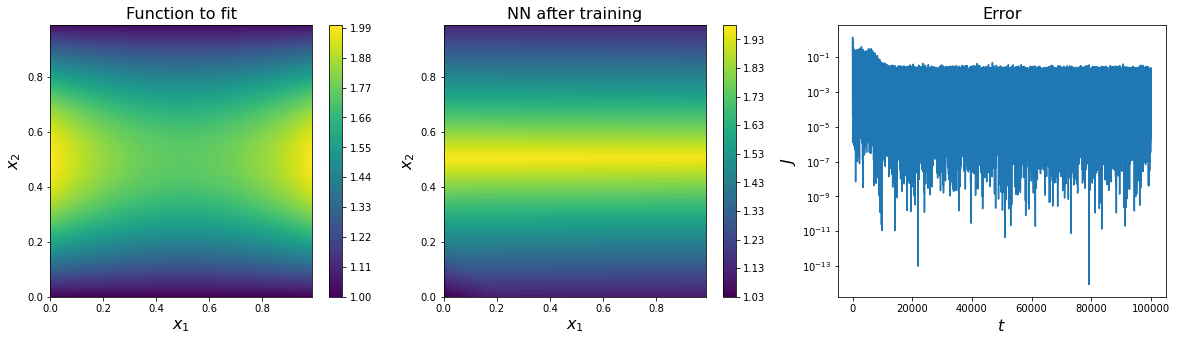

In [33]:
alpha = 0.01       # Learning parameter
Nsamples = 100000  # Number of samples

# Training set
x = np.random.rand(3,Nsamples)
x[0] = np.ones(Nsamples)
y = f_deterministic(x)

# Random initialisation of matrices
Theta0 = np.random.normal(scale=1.0,size=(Ns[1],Ns[0]))
Theta1 = np.random.normal(scale=1.0,size=(Ns[2],Ns[1]))
Theta2 = np.random.normal(scale=1.0,size=(Ns[3],Ns[2]))
Thetas = (Theta0, Theta1, Theta2)

J = np.zeros(Nsamples)
for t in range(Nsamples):
    # TODO : put your code here, use with J = (h - yi) for the error
    
    J[t] = np.random.rand()


# FIGURES    
plt.figure(figsize=(20,5))

fig1 = plt.subplot(131)
fig1.set_title("Function to fit", fontsize=16)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
xx1, xx2 = np.meshgrid(x1, x2)
xx0 = np.ones(xx1.shape)
xx = np.stack((xx0, xx1, xx2), axis=0)
z = f_deterministic(xx)
h = plt.contourf(x1,x2,z,100)
cbar = plt.colorbar(h)

fig2 = plt.subplot(132)
fig2.set_title("NN after training", fontsize=16)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
zz = np.zeros(xx1.shape)
for i in range(xx0.shape[0]):
    for j in range(xx0.shape[1]):
        zz[i,j],_ ,_ = NN(Thetas, np.array(xx[:,i,j])) 
h = plt.contourf(x1,x2,zz,100)
cbar = plt.colorbar(h)

fig3 = plt.subplot(133)
fig3.set_title("Error", fontsize=16)
plt.xlabel('$t$', fontsize=16)
plt.ylabel('$J$', fontsize=16)
plt.semilogy(np.arange(Nsamples),J)

### Mini-batch gradient descent

Now, we want to implement a mini-batch gradient descent, where at each step, $N_{batch}$ samples are drawn at random from the training set. 

### Question 5
Code the mini-batch gradient descent

In [18]:
alpha = 0.01       # Learning parameter
Nsamples = 100000  # Number of samples
Nbatch = 10        # Size of mini-batch
Nstep = 100000     # Number of mini-batches for training

# Random initialisation of matrices
Theta0 = np.random.normal(scale=1.0,size=(Ns[1],Ns[0]))
Theta1 = np.random.normal(scale=1.0,size=(Ns[2],Ns[1]))
Theta2 = np.random.normal(scale=1.0,size=(Ns[3],Ns[2]))
Thetas = (Theta0, Theta1, Theta2)

for step in range(Nstep):
    # select Nbatch ramdom sample
    # 

In [19]:
# Your code here